<a href="https://colab.research.google.com/github/ziadalaa7/AI-Network-Threat-Detection/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🚨 AI-Powered Network Threat Detection
    Problem formulation
    With the rapid increase in cyberattacks, traditional rule-based intrusion detection systems struggle to adapt to evolving threats. There is a need for an intelligent system that can automatically detect anomalies in real-time network traffic and differentiate between normal and malicious activities. The formulated problem is: How can we design a scalable, adaptive, and accurate AI-powered system to detect suspicious activities in network traffic?

## Problem Description
    This project aims to develop a machine learning–driven solution for network threat detection. The system leverages advanced AI methods such as anomaly detection, Natural Language Processing (for log analysis), and classification algorithms to recognize malicious behaviors. It analyzes multiple network features including packet flow rates, inter-arrival times, TCP flags, and communication patterns to detect threats such as:

    Distributed Denial of Service (DDoS) attacks
    Port scanning
    Brute-force login attempts
    Data exfiltration
    Unlike traditional signature-based systems, this solution learns from new data and continuously adapts to emerging threats.

## Objectives
    Provide real-time monitoring of network traffic.
    Detect cyber threats early, before escalation.
    Automate alerts to reduce the workload on security teams.
    Ensure scalability to handle large volumes of traffic.
    Enhance cybersecurity resilience through proactive and adaptive defense mechanisms.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows" , None)
pd.set_option("display.max_columns" , None)


df1 = pd.read_csv("/content/drive/MyDrive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Monday-WorkingHours.pcap_ISCX.csv")
df5 = pd.read_csv("/content/drive/MyDrive/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6 = pd.read_csv("/content/drive/MyDrive/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7 = pd.read_csv("/content/drive/MyDrive/Tuesday-WorkingHours.pcap_ISCX.csv")
df8 = pd.read_csv("/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv")

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                       6   
4                             0                       6   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       6                      6.0                     0.0   
1                       6                      6.0                     0.0   
2                       6                      6.0                     0.0   
3                       6                      6.0                     0.0   
4                       6                      6.0                     0.0   

   Bwd Packet Length Max   Bwd Packet Length Min   Bwd Packet Length Mean  \
0                      0                       0                      0.0   
1                      6                       6                      6.0   
2                      6                       6                      6.0   
3                      6                       6                      6.0   
4                      0                       0                      0.0   

    Bwd Packet Length Std  Flow Bytes/s   Flow Packets/s   Flow IAT Mean  \
0                     0.0  4.000000e+06     666666.66670             3.0   
1                     0.0  1.100917e+05      18348.62385           109.0   
2                     0.0  2.307692e+05      38461.53846            52.0   
3                     0.0  3.529412e+05      58823.52941            34.0   
4                     0.0  4.000000e+06     666666.66670             3.0   

    Flow IAT Std   Flow IAT Max   Flow IAT Min  Fwd IAT Total   Fwd IAT Mean  \
0            0.0              3              3              3            3.0   
1            0.0            109            109              0            0.0   
2            0.0             52             52              0            0.0   
3            0.0             34             34              0            0.0   
4            0.0              3              3              3            3.0   

    Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean  \
0           0.0             3             3              0            0.0   
1           0.0             0             0              0            0.0   
2           0.0             0             0              0            0.0   
3           0.0             0             0              0            0.0   
4           0.0             3             3              0            0.0   

    Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags   Bwd PSH Flags  \
0           0.0             0             0              0               0   
1           0.0             0             0              0               0   
2           0.0             0             0              0               0   
3           0.0             0             0              0               0   
4           0.0             0             0              0               0   

    Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bwd Header Length  \
0               0               0                  40 

In [3]:
df.shape

(2830743, 79)

In [4]:
df = df.rename(columns=lambda x: x.strip().lower())
df.columns

Index(['destination port', 'flow duration', 'total fwd packets',
       'total backward packets', 'total length of fwd packets',
       'total length of bwd packets', 'fwd packet length max',
       'fwd packet length min', 'fwd packet length mean',
       'fwd packet length std', 'bwd packet length max',
       'bwd packet length min', 'bwd packet length mean',
       'bwd packet length std', 'flow bytes/s', 'flow packets/s',
       'flow iat mean', 'flow iat std', 'flow iat max', 'flow iat min',
       'fwd iat total', 'fwd iat mean', 'fwd iat std', 'fwd iat max',
       'fwd iat min', 'bwd iat total', 'bwd iat mean', 'bwd iat std',
       'bwd iat max', 'bwd iat min', 'fwd psh flags', 'bwd psh flags',
       'fwd urg flags', 'bwd urg flags', 'fwd header length',
       'bwd header length', 'fwd packets/s', 'bwd packets/s',
       'min packet length', 'max packet length', 'packet length mean',
       'packet length std', 'packet length variance', 'fin flag count',
       'syn flag co

## Check NaN values

In [5]:
pd.set_option("display.max_rows" , None)
pd.set_option("display.max_columns" , None)

round(df.isna().sum()/len(df) , 3)

destination port               0.0
flow duration                  0.0
total fwd packets              0.0
total backward packets         0.0
total length of fwd packets    0.0
total length of bwd packets    0.0
fwd packet length max          0.0
fwd packet length min          0.0
fwd packet length mean         0.0
fwd packet length std          0.0
bwd packet length max          0.0
bwd packet length min          0.0
bwd packet length mean         0.0
bwd packet length std          0.0
flow bytes/s                   0.0
flow packets/s                 0.0
flow iat mean                  0.0
flow iat std                   0.0
flow iat max                   0.0
flow iat min                   0.0
fwd iat total                  0.0
fwd iat mean                   0.0
fwd iat std                    0.0
fwd iat max                    0.0
fwd iat min                    0.0
bwd iat total                  0.0
bwd iat mean                   0.0
bwd iat std                    0.0
bwd iat max                    0.0
bwd iat min                    0.0
fwd psh flags                  0.0
bwd psh flags                  0.0
fwd urg flags                  0.0
bwd urg flags                  0.0
fwd header length              0.0
bwd header length              0.0
fwd packets/s                  0.0
bwd packets/s                  0.0
min packet length              0.0
max packet length              0.0
packet length mean             0.0
packet length std              0.0
packet length variance         0.0
fin flag count                 0.0
syn flag count                 0.0
rst flag count                 0.0
psh flag count                 0.0
ack flag count                 0.0
urg flag count                 0.0
cwe flag count                 0.0
ece flag count                 0.0
down/up ratio                  0.0
average packet size            0.0
avg fwd segment size           0.0
avg bwd segment size           0.0
fwd header length.1            0.0
fwd avg bytes/bulk             0.0
fwd avg packets/bulk           0.0
fwd avg bulk rate              0.0
bwd avg bytes/bulk             0.0
bwd avg packets/bulk           0.0
bwd avg bulk rate              0.0
subflow fwd packets            0.0
subflow fwd bytes              0.0
subflow bwd packets            0.0
subflow bwd bytes              0.0
init_win_bytes_forward         0.0
init_win_bytes_backward        0.0
act_data_pkt_fwd               0.0
min_seg_size_forward           0.0
active mean                    0.0
active std                     0.0
active max                     0.0
active min                     0.0
idle mean                      0.0
idle std                       0.0
idle max                       0.0
idle min                       0.0
label                          0.0
dtype: float64

## Check negative values

In [6]:
df["init_win_bytes_backward"].value_counts()

init_win_bytes_backward
-1        1441552
 0         271893
 235       178098
 229       104516
 256        42608
 31         18791
 33304      18319
 60         17744
 29200      16131
 65535      15046
 946        13959
 255        13940
 32832      13534
 122        11388
 939        11242
 123        11073
 360        10920
 972        10917
 245        10675
 119        10173
 28960       9834
 114         9732
 252         9562
 357         9446
 349         9386
 237         9288
 118         8839
 62          8696
 243         8690
 110         8618
 32          8183
 254         7802
 351         7556
 227         7376
 30          6629
 980         6530
 253         6270
 247         6268
 343         6032
 61          6016
 362         5820
 340         5726
 290         5226
 30016       5157
 127         4865
 64          4842
 258         4589
 32850       4215
 33          4138
 126         4039
 16425       3892
 63          3740
 66          3692
 1006        3510
 59          3415
 131         3385
 1024        3358
 115         3320
 29          3315
 42780       3174
 65          3135
 251         3012
 1013        2943
 368         2867
 292         2817
 130         2767
 8           2686
 31088       2446
 64240       2325
 257         2276
 8190        2251
 8192        2068
 5120        2056
 35          2023
 42408       2002
 16384       1958
 288         1938
 70          1909
 250         1908
 365         1897
 11          1890
 26883       1880
 14600       1867
 71          1792
 4380        1781
 4050        1731
 269         1728
 2081        1726
 40958       1709
 383         1701
 338         1694
 116         1694
 377         1677
 75          1668
 124         1665
 34          1606
 370         1586
 296         1495
 285         1478
 68          1435
 1120        1423
 1039        1413
 260         1411
 132         1405
 11256       1385
 240         1385
 120         1350
 294         1339
 287         1330
 128         1315
 179         1304
 241         1271
 180         1246
 57          1240
 512         1238
 1047        1238
 136         1231
 79          1204
 135         1191
 125         1182
 140         1182
 373         1176
 175         1174
 1026        1149
 513         1136
 40          1086
 12          1083
 374         1067
 310         1061
 139         1057
 11584       1046
 305         1039
 9           1039
 302         1036
 385         1010
 246          991
 23           974
 361          972
 274          966
 333          959
 2053         959
 176          950
 117          946
 342          937
 2049         928
 67           926
 350          916
 121          914
 2051         908
 298          903
 14480        880
 299          869
 15544        852
 672          839
 5840         838
 382          829
 26847        827
 344          821
 332          818
 353          810
 37           810
 133          792
 358          792
 2052         776
 244          775
 129          775
 16560        738
 352          729
 38           720
 319          714
 22           705
 73           705
 36           704
 1073         698
 58           696
 54           694
 236          693
 339          693
 64209        688
 69           684
 307          680
 391          676
 259          675
 262          673
 1324         651
 1129         628
 35040        622
 395          616
 364          613
 297          609
 393          598
 239          593
 389          591
 16           589
 316          573
 134          557
 320          557
 16360        555
 4            553
 12579        545
 18           542
 1080         540
 32160        536
 77           533
 2076         532
 2078         529
 248          528
 330          527
 16060        525
 143          520
 10240        519
 17           518
 410          516
 359          516
 304          513
 390          506
 82           505
 219          503
 148          503
 249          498
 2079         49

In [7]:
def negative_values (dataframe) :
    l = []
    v = set()
    c = 0
    dataframe = dataframe.drop(columns = ["label"])
    for j in dataframe.columns :
        data = df[j].value_counts()
        for i in data.index :
            if float(i) < 0 :
                c += data[i]
                v.add(i)
        l.append(c)
        # print(f"Num of negative values in {j} :{c}")
        c = 0
    print(f"There is ({sum(l)}) negative value")
    return v

In [8]:
set_of_negative = print(negative_values(df))

There is (2446321) negative value
{-12000000.0, -6000000.0, -8000000.0, -4000000.0, -2000000.0, -167770494, -167770490, -83885181, -153846.1538, -167770470, -461538.4615, -167770458, -83885145, -83885015, -1929349973, -83885011, -4831831506, -83885137, -83885133, -83885125, -261000000.0, -193000000.0, -1000000.0, -1073740992, -536870660, -83885113, -32212234632, -6442447920, -666666.6667, -8, -1006620072, -83885221, -83885093, -1073741218, -500000.0, -167770400, -1006623756, -9663668122, -83885081, -1073741320, -536870661, -2147482640, -14, -13, -12, -11, -166666.6667, -1, -10, -922738443, -6, -5, -4, -3, -2, -83885313}


In [9]:
set_of_negative = negative_values(df)
for col in df.columns:
    df[col] = df[col].mask(df[col].isin(set_of_negative), np.nan)
round(df.isna().sum()/len(df)*100 , 3).sort_values()

There is (2446321) negative value


destination port                0.000
total fwd packets               0.000
total backward packets          0.000
total length of fwd packets     0.000
fwd packet length max           0.000
total length of bwd packets     0.000
fwd packet length min           0.000
fwd packet length mean          0.000
bwd packet length mean          0.000
fwd packet length std           0.000
bwd packet length max           0.000
bwd packet length min           0.000
bwd packet length std           0.000
fwd iat mean                    0.000
fwd iat std                     0.000
flow iat std                    0.000
fwd psh flags                   0.000
bwd iat min                     0.000
bwd psh flags                   0.000
fwd iat total                   0.000
fwd iat max                     0.000
bwd iat std                     0.000
bwd iat mean                    0.000
bwd iat total                   0.000
bwd iat max                     0.000
packet length std               0.000
max packet length               0.000
min packet length               0.000
fwd packets/s                   0.000
bwd packets/s                   0.000
bwd urg flags                   0.000
fwd urg flags                   0.000
bwd avg packets/bulk            0.000
fwd avg packets/bulk            0.000
ece flag count                  0.000
down/up ratio                   0.000
average packet size             0.000
avg fwd segment size            0.000
avg bwd segment size            0.000
packet length mean              0.000
syn flag count                  0.000
rst flag count                  0.000
packet length variance          0.000
fin flag count                  0.000
psh flag count                  0.000
ack flag count                  0.000
cwe flag count                  0.000
urg flag count                  0.000
subflow fwd packets             0.000
bwd avg bulk rate               0.000
fwd avg bulk rate               0.000
bwd avg bytes/bulk              0.000
subflow fwd bytes               0.000
fwd avg bytes/bulk              0.000
idle min                        0.000
idle max                        0.000
active max                      0.000
active min                      0.000
idle mean                       0.000
active std                      0.000
act_data_pkt_fwd                0.000
active mean                     0.000
subflow bwd bytes               0.000
subflow bwd packets             0.000
label                           0.000
idle std                        0.000
fwd header length               0.001
fwd iat min                     0.001
min_seg_size_forward            0.001
bwd header length               0.001
fwd header length.1             0.001
flow packets/s                  0.004
flow duration                   0.004
flow iat mean                   0.004
flow iat max                    0.004
flow bytes/s                    0.051
flow iat min                    0.102
init_win_bytes_forward         35.368
init_win_bytes_backward        50.925
dtype: float64

In [10]:
df.head()

destination port  flow duration  total fwd packets  total backward packets  \
0             54865            3.0                  2                       0   
1             55054          109.0                  1                       1   
2             55055           52.0                  1                       1   
3             46236           34.0                  1                       1   
4             54863            3.0                  2                       0   

   total length of fwd packets  total length of bwd packets  \
0                           12                            0   
1                            6                            6   
2                            6                            6   
3                            6                            6   
4                           12                            0   

   fwd packet length max  fwd packet length min  fwd packet length mean  \
0                      6                      6                     6.0   
1                      6                      6                     6.0   
2                      6                      6                     6.0   
3                      6                      6                     6.0   
4                      6                      6                     6.0   

   fwd packet length std  bwd packet length max  bwd packet length min  \
0                    0.0                      0                      0   
1                    0.0                      6                      6   
2                    0.0                      6                      6   
3                    0.0                      6                      6   
4                    0.0                      0                      0   

   bwd packet length mean  bwd packet length std  flow bytes/s  \
0                     0.0                    0.0  4.000000e+06   
1                     6.0                    0.0  1.100917e+05   
2                     6.0                    0.0  2.307692e+05   
3                     6.0                    0.0  3.529412e+05   
4                     0.0                    0.0  4.000000e+06   

   flow packets/s  flow iat mean  flow iat std  flow iat max  flow iat min  \
0    666666.66670            3.0           0.0           3.0           3.0   
1     18348.62385          109.0           0.0         109.0         109.0   
2     38461.53846           52.0           0.0          52.0          52.0   
3     58823.52941           34.0           0.0          34.0          34.0   
4    666666.66670            3.0           0.0           3.0           3.0   

   fwd iat total  fwd iat mean  fwd iat std  fwd iat max  fwd iat min  \
0              3           3.0          0.0            3          3.0   
1              0           0.0          0.0            0          0.0   
2              0           0.0          0.0            0          0.0   
3              0           0.0          0.0            0          0.0   
4              3           3.0          0.0            3          3.0   

   bwd iat total  bwd iat mean  bwd iat std  bwd iat max  bwd iat min  \
0              0           0.0          0.0            0            0   
1              0           0.0          0.0            0            0   
2              0           0.0          0.0            0            0   
3              0           0.0          0.0            0            0   
4              0           0.0          0.0            0            0   

   fwd psh flags  bwd psh flags  fwd urg flags  bwd urg flags  \
0              0              0              0              0   
1              0              0              0              0   
2              0              0              0              0   
3              0              0              0              0   
4              0              0              0              0   

   fwd header length  bwd header length  fwd packets/s  bwd packets/s  \
0               40.0             

## Drop (init_win_bytes_forward , init_win_bytes_backward) redundant columns

In [11]:
df.drop(columns=["init_win_bytes_forward" , "init_win_bytes_backward"] , inplace = True)

In [12]:
nan = round(df.isna().sum() , 3).sort_values()
c = 0
for i in range(len(nan)) :
    c += nan[i]
print(f"There is {c} NaN values")


There is 4938 NaN values


/tmp/ipython-input-3720852852.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c += nan[i]


In [13]:
df.shape

(2830743, 77)

In [14]:
df.dropna(inplace=True)
df = df.drop_duplicates(keep='first')

In [15]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df.shape

(2470833, 77)

## We loss 359,910 record of the data after handeling NaN & -ve values and Remove duplicate rows

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2470833 entries, 0 to 692702
Data columns (total 77 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination port             int64  
 1   flow duration                float64
 2   total fwd packets            int64  
 3   total backward packets       int64  
 4   total length of fwd packets  int64  
 5   total length of bwd packets  int64  
 6   fwd packet length max        int64  
 7   fwd packet length min        int64  
 8   fwd packet length mean       float64
 9   fwd packet length std        float64
 10  bwd packet length max        int64  
 11  bwd packet length min        int64  
 12  bwd packet length mean       float64
 13  bwd packet length std        float64
 14  flow bytes/s                 float64
 15  flow packets/s               float64
 16  flow iat mean                float64
 17  flow iat std                 float64
 18  flow iat max                 float64
 19  flow i

## Reduce float values from (float 64 -> float 32) & int values from (int 64 -> int 32)

In [17]:
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype(np.float32)

for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype(np.int32)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2470833 entries, 0 to 692702
Data columns (total 77 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination port             int32  
 1   flow duration                float32
 2   total fwd packets            int32  
 3   total backward packets       int32  
 4   total length of fwd packets  int32  
 5   total length of bwd packets  int32  
 6   fwd packet length max        int32  
 7   fwd packet length min        int32  
 8   fwd packet length mean       float32
 9   fwd packet length std        float32
 10  bwd packet length max        int32  
 11  bwd packet length min        int32  
 12  bwd packet length mean       float32
 13  bwd packet length std        float32
 14  flow bytes/s                 float32
 15  flow packets/s               float32
 16  flow iat mean                float32
 17  flow iat std                 float32
 18  flow iat max                 float32
 19  flow i

## Dealing with label column

In [19]:
df["label"].value_counts()

label
BENIGN                        2046251
DoS Hulk                       171840
DDoS                           127995
PortScan                        90694
DoS GoldenEye                   10276
FTP-Patator                      5927
DoS slowloris                    5385
DoS Slowhttptest                 5227
SSH-Patator                      3153
Bot                              1944
Web Attack � Brute Force         1427
Web Attack � XSS                  652
Infiltration                       35
Web Attack � Sql Injection         20
Heartbleed                          7
Name: count, dtype: int64

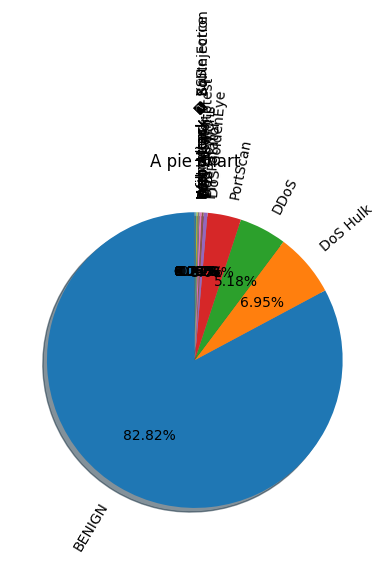

In [20]:
data =df["label"].value_counts()
label = df["label"].value_counts().index
plt.pie(data, labels=label, shadow=True, startangle=90, autopct="%1.2f%%", rotatelabels=True)
plt.title("A pie chart")
plt.show()

## Grouping categories to reduce it from 15 label to 9 labbel

In [21]:
mapping = {
    'BENIGN': 'Benign',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'DDoS': 'DDoS',
    'PortScan': 'PortScan',
    'Bot': 'Bot',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

df['Attack_Category'] = df['label'].map(mapping)
df["Attack_Category"].value_counts()

Attack_Category
Benign          2046251
DoS              192728
DDoS             127995
PortScan          90694
Brute Force        9080
Web Attack         2099
Bot                1944
Infiltration         35
Heartbleed            7
Name: count, dtype: int64

In [22]:
round(df["Attack_Category"].value_counts()/len(df)*100 , 5)

Attack_Category
Benign          82.81624
DoS              7.80012
DDoS             5.18024
PortScan         3.67058
Brute Force      0.36749
Web Attack       0.08495
Bot              0.07868
Infiltration     0.00142
Heartbleed       0.00028
Name: count, dtype: float64

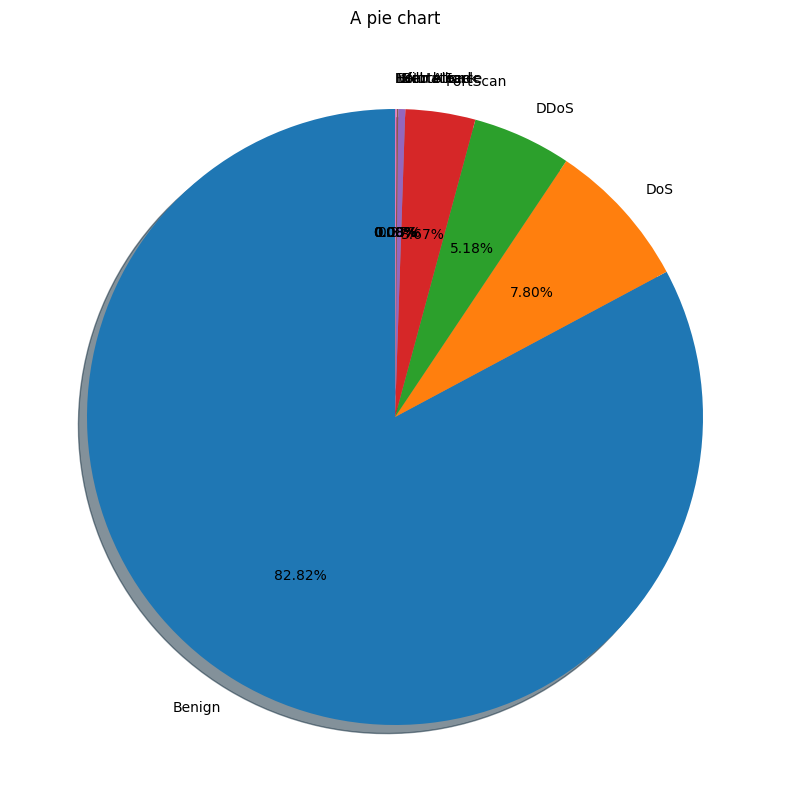

In [23]:
data =df["Attack_Category"].value_counts()
label = df["Attack_Category"].value_counts().index
plt.figure(figsize=(10,10))
plt.title("A pie chart")
plt.pie(data, labels=label, shadow=True, startangle=90, autopct="%1.2f%%", rotatelabels=False)
plt.show()

In [24]:
df.drop(columns=["label"] , inplace = True)
df.shape

(2470833, 77)

In [25]:
df.head()

destination port  flow duration  total fwd packets  total backward packets  \
0             54865            3.0                  2                       0   
1             55054          109.0                  1                       1   
2             55055           52.0                  1                       1   
3             46236           34.0                  1                       1   
4             54863            3.0                  2                       0   

   total length of fwd packets  total length of bwd packets  \
0                           12                            0   
1                            6                            6   
2                            6                            6   
3                            6                            6   
4                           12                            0   

   fwd packet length max  fwd packet length min  fwd packet length mean  \
0                      6                      6                     6.0   
1                      6                      6                     6.0   
2                      6                      6                     6.0   
3                      6                      6                     6.0   
4                      6                      6                     6.0   

   fwd packet length std  bwd packet length max  bwd packet length min  \
0                    0.0                      0                      0   
1                    0.0                      6                      6   
2                    0.0                      6                      6   
3                    0.0                      6                      6   
4                    0.0                      0                      0   

   bwd packet length mean  bwd packet length std  flow bytes/s  \
0                     0.0                    0.0  4.000000e+06   
1                     6.0                    0.0  1.100917e+05   
2                     6.0                    0.0  2.307692e+05   
3                     6.0                    0.0  3.529412e+05   
4                     0.0                    0.0  4.000000e+06   

   flow packets/s  flow iat mean  flow iat std  flow iat max  flow iat min  \
0   666666.687500            3.0           0.0           3.0           3.0   
1    18348.623047          109.0           0.0         109.0         109.0   
2    38461.539062           52.0           0.0          52.0          52.0   
3    58823.531250           34.0           0.0          34.0          34.0   
4   666666.687500            3.0           0.0           3.0           3.0   

   fwd iat total  fwd iat mean  fwd iat std  fwd iat max  fwd iat min  \
0              3           3.0          0.0            3          3.0   
1              0           0.0          0.0            0          0.0   
2              0           0.0          0.0            0          0.0   
3              0           0.0          0.0            0          0.0   
4              3           3.0          0.0            3          3.0   

   bwd iat total  bwd iat mean  bwd iat std  bwd iat max  bwd iat min  \
0              0           0.0          0.0            0            0   
1              0           0.0          0.0            0            0   
2              0           0.0          0.0            0            0   
3              0           0.0          0.0            0            0   
4              0           0.0          0.0            0            0   

   fwd psh flags  bwd psh flags  fwd urg flags  bwd urg flags  \
0              0              0              0              0   
1              0              0              0              0   
2              0              0              0              0   
3              0              0              0              0   
4              0              0              0              0   

   fwd header length  bwd header length  fwd packets/s  bwd packets/s  \
0               40.0             

In [26]:
gg = df

## Feature selection

In [27]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["label"] = label.fit_transform(df["Attack_Category"])
df.shape

(2470833, 78)

Feature importance from LightGBM:
                        feature  importance
0              destination port        3116
19                 flow iat min        1531
24                  fwd iat min        1101
14                 flow bytes/s        1048
1                 flow duration        1010
37                bwd packets/s         700
29                  bwd iat min         677
4   total length of fwd packets         652
36                fwd packets/s         619
16                flow iat mean         586
15               flow packets/s         515
34            fwd header length         473
8        fwd packet length mean         425
18                 flow iat max         413
22                  fwd iat std         398
9         fwd packet length std         381
17                 flow iat std         380
20                fwd iat total         369
52          average packet size         359
21                 fwd iat mean         348
6         fwd packet length max         32

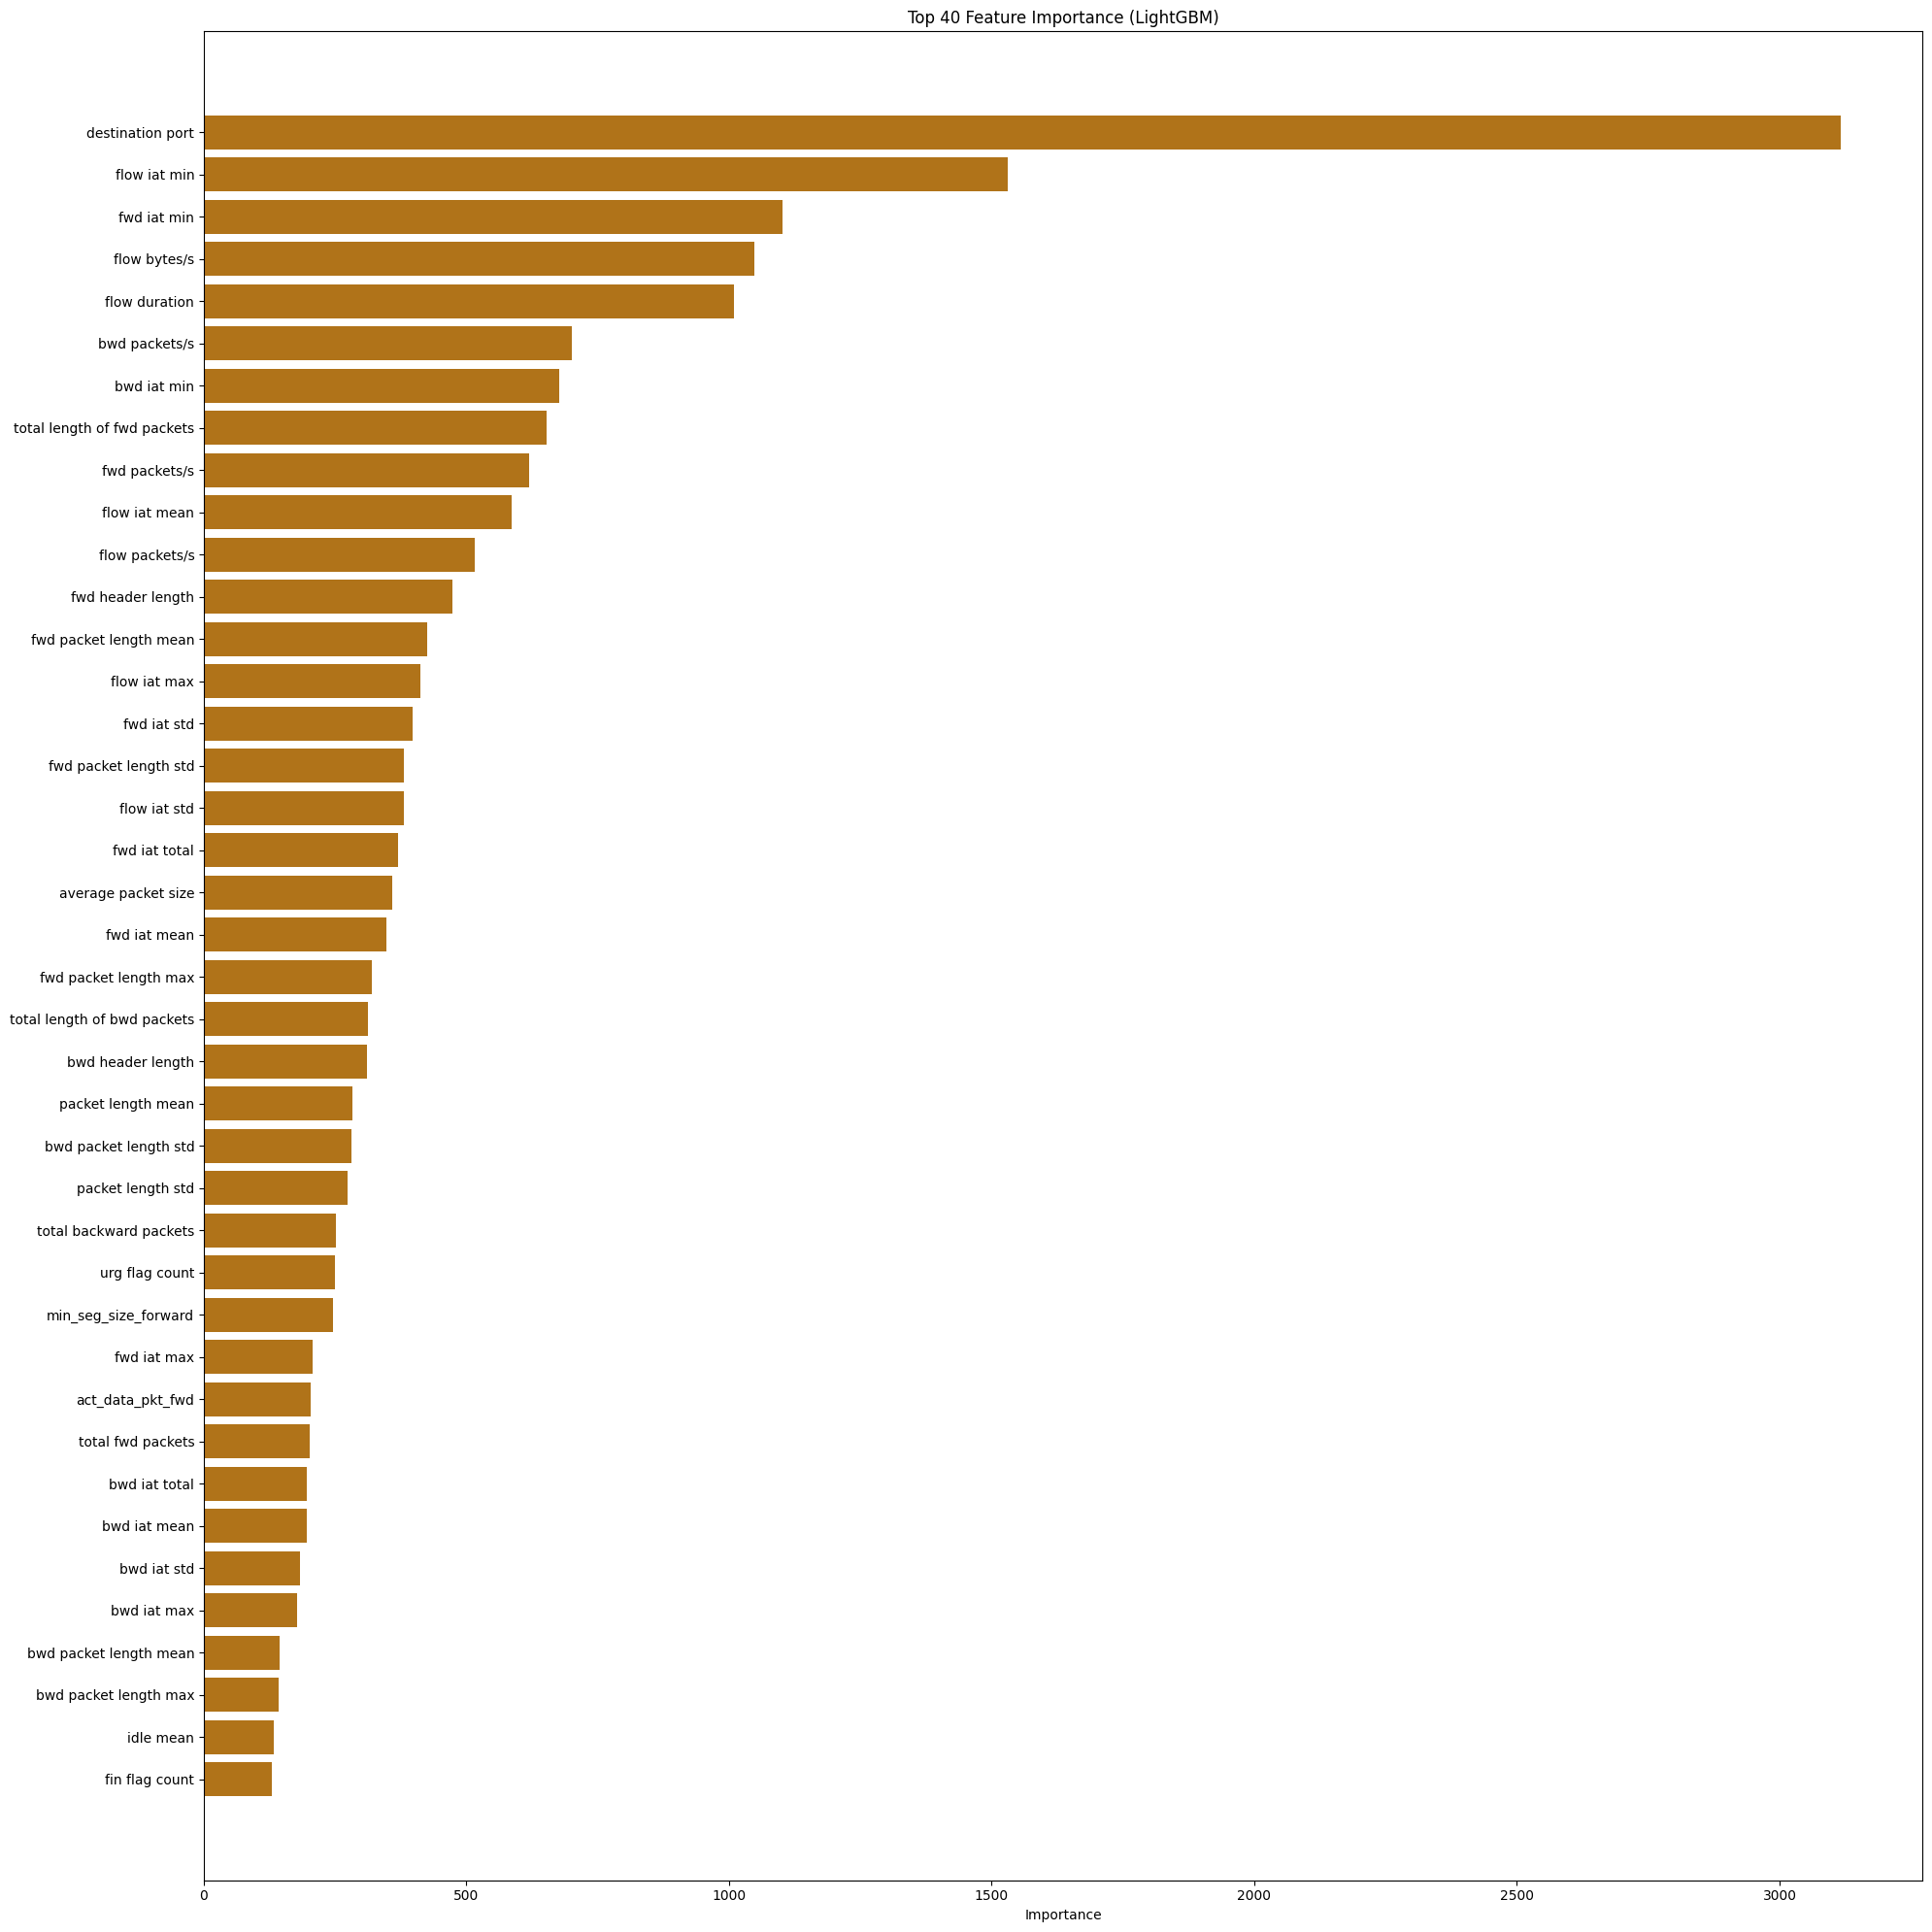

In [28]:
from lightgbm import LGBMClassifier


df_sample = df.sample(n=400_000, random_state=42)
x = df_sample.drop(columns=["Attack_Category", "label"])
y = df_sample["label"]

model = LGBMClassifier(
    n_estimators=100,
    random_state=42,
    verbose=-1
)

model.fit(x, y)
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({
    "feature": x.columns,
    "importance": feature_importance
}).sort_values(by="importance", ascending=False)

print("Feature importance from LightGBM:")
print(importance_df)


plt.figure(figsize=(20, 20))
plt.barh(importance_df["feature"][:40], importance_df["importance"][:40] , color = "#b07319" )
plt.gca().invert_yaxis()
plt.title("Top 40 Feature Importance (LightGBM)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [29]:
df_sample["label"].value_counts()

label
0    331145
4     31273
3     20694
7     14698
2      1534
8       345
1       304
6         7
Name: count, dtype: int64

In [30]:
final_features = importance_df[importance_df['importance'] >= 100 ].set_index(x for x in range(1 ,47))
final_features

feature  importance
1              destination port        3116
2                  flow iat min        1531
3                   fwd iat min        1101
4                  flow bytes/s        1048
5                 flow duration        1010
6                 bwd packets/s         700
7                   bwd iat min         677
8   total length of fwd packets         652
9                 fwd packets/s         619
10                flow iat mean         586
11               flow packets/s         515
12            fwd header length         473
13       fwd packet length mean         425
14                 flow iat max         413
15                  fwd iat std         398
16        fwd packet length std         381
17                 flow iat std         380
18                fwd iat total         369
19          average packet size         359
20                 fwd iat mean         348
21        fwd packet length max         320
22  total length of bwd packets         312
23            bwd header length         310
24           packet length mean         283
25        bwd packet length std         281
26            packet length std         273
27       total backward packets         252
28               urg flag count         250
29         min_seg_size_forward         245
30                  fwd iat max         207
31             act_data_pkt_fwd         203
32            total fwd packets         202
33                bwd iat total         196
34                 bwd iat mean         196
35                  bwd iat std         183
36                  bwd iat max         177
37       bwd packet length mean         144
38        bwd packet length max         143
39                    idle mean         134
40               fin flag count         130
41            max packet length         123
42                  active mean         117
43                   active std         116
44                down/up ratio         111
45        bwd packet length min         110
46        fwd packet length min         100

## Heatmap for final featurers

/tmp/ipython-input-906025557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["label"] = df["label"]


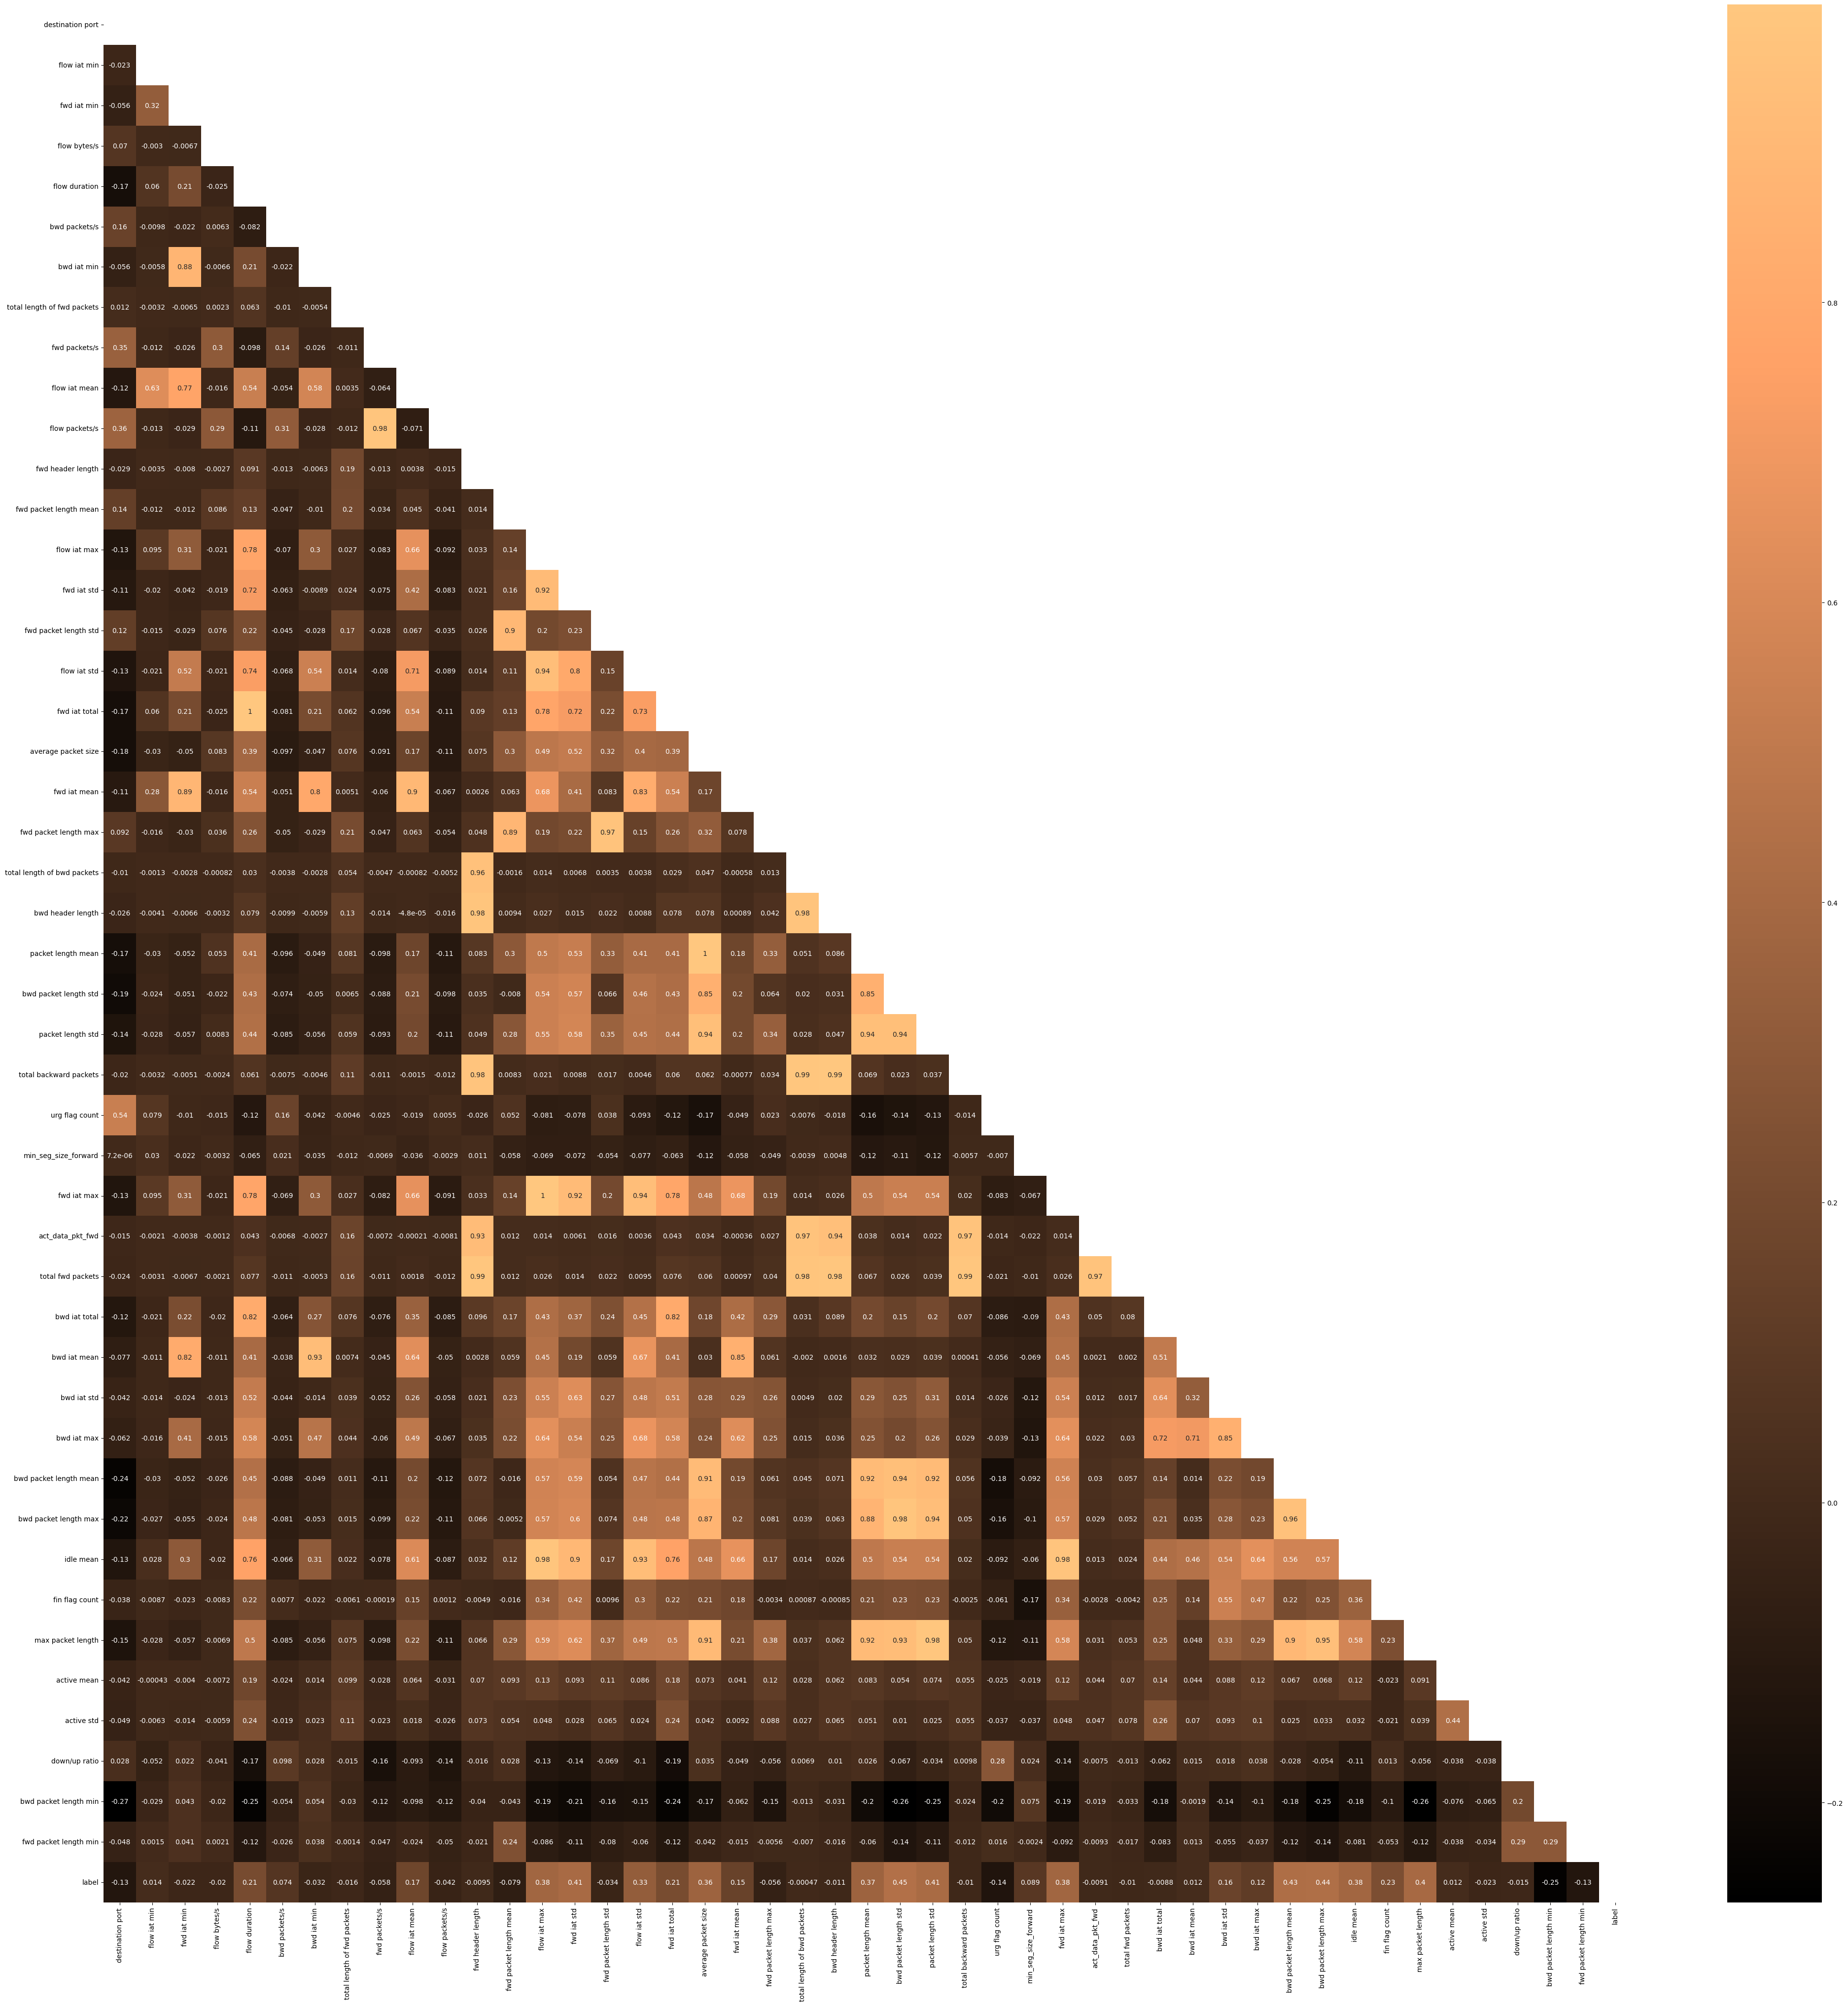

In [31]:
df_2 = df[[x for x in final_features["feature"]]]
df_2["label"] = df["label"]
df_2_matrix = df_2.corr()
mask = np.triu(np.ones_like(df_2_matrix , dtype=bool))


plt.figure(figsize=(50,50))
sns.heatmap(df_2_matrix , mask=mask ,  annot= True , cmap= "copper")
plt.savefig("heatmap_for_46_feature.png", dpi=300, bbox_inches='tight')
plt.show()

## find the most correlated features

/tmp/ipython-input-2141431155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3["label"] = df["label"]


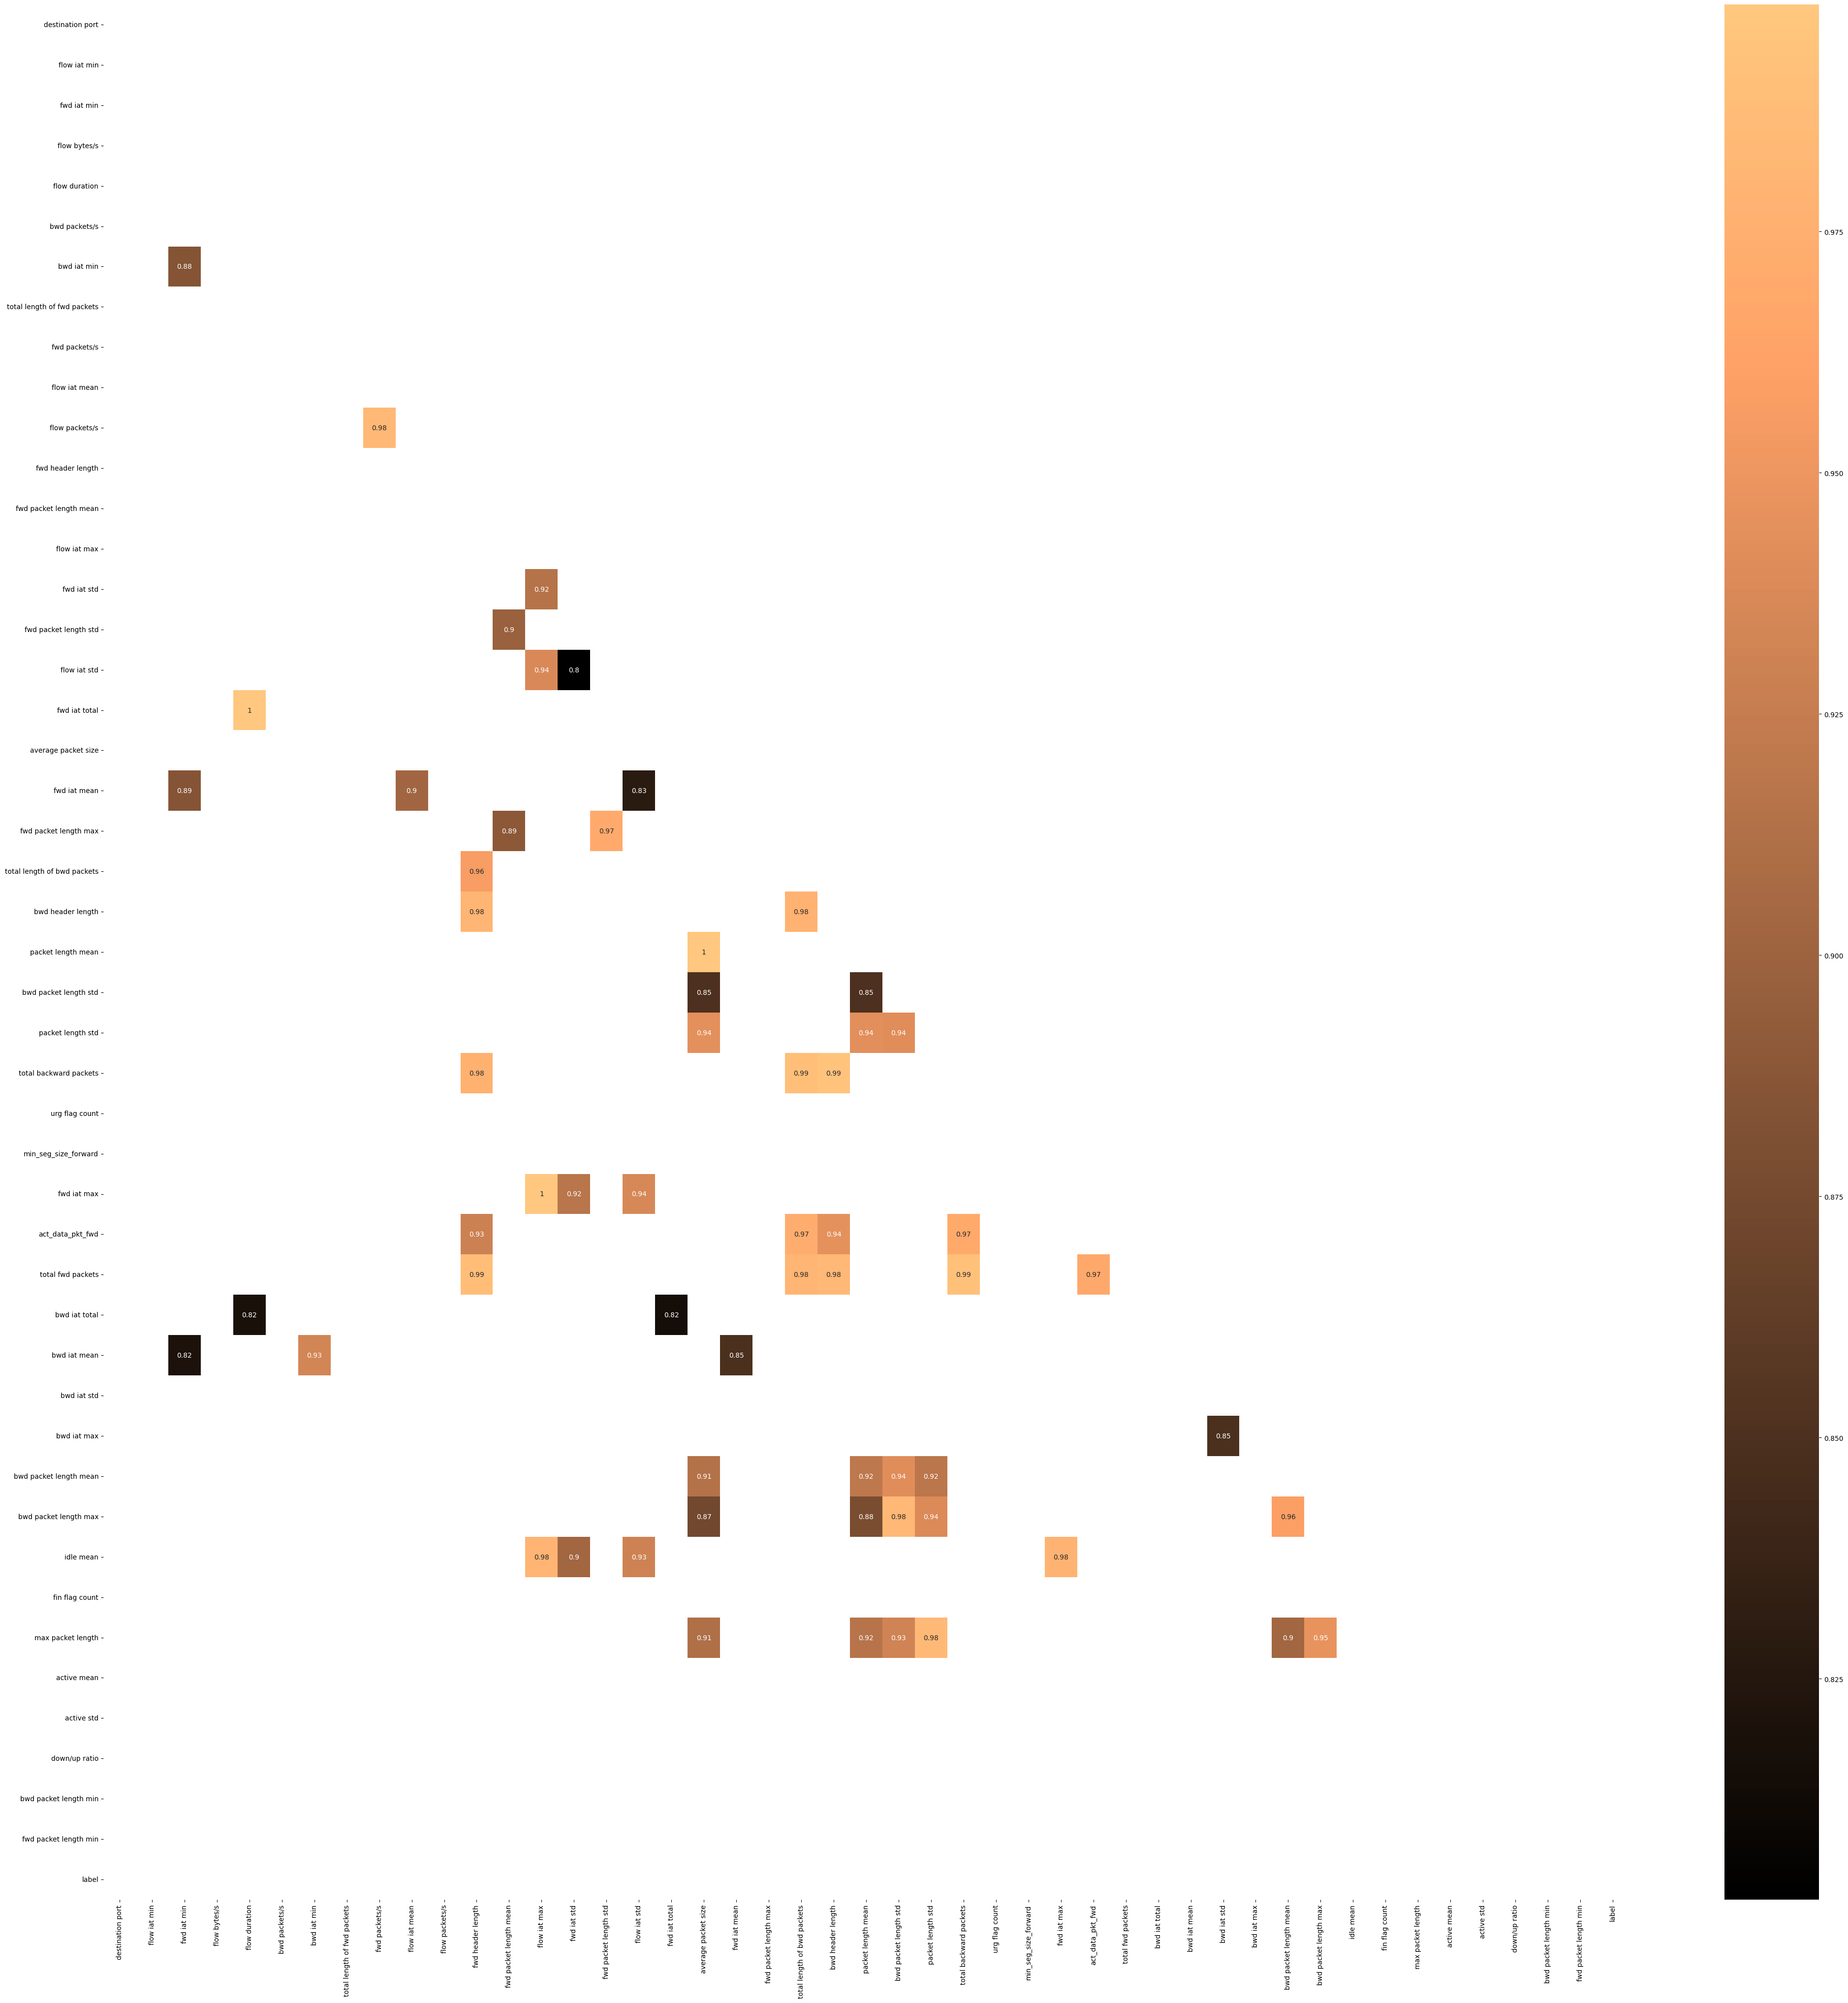

In [32]:
df_3 = df[[x for x in final_features["feature"]]]
df_3["label"] = df["label"]
df_3_matrix = df_3.corr()
mask = np.triu(np.ones_like(df_3_matrix , dtype=bool))
high_corr = df_3_matrix[(df_3_matrix > 0.8) | (df_3_matrix < -0.8)]
plt.figure(figsize=(50,50))
sns.heatmap(high_corr , mask=mask ,  annot= True , cmap= "copper")
# plt.savefig("heatmap_for_high_corr.png", dpi=300, bbox_inches='tight')
plt.savefig("heatmap_for_high_corr.svg", dpi=300, bbox_inches='tight')
plt.show()

In [33]:
for i in (final_features.index) :
  print(f"{i}. {final_features["feature"][i]}")


1. destination port
2. flow iat min
3. fwd iat min
4. flow bytes/s
5. flow duration
6. bwd packets/s
7. bwd iat min
8. total length of fwd packets
9. fwd packets/s
10. flow iat mean
11. flow packets/s
12. fwd header length
13. fwd packet length mean
14. flow iat max
15. fwd iat std
16. fwd packet length std
17. flow iat std
18. fwd iat total
19. average packet size
20. fwd iat mean
21. fwd packet length max
22. total length of bwd packets
23. bwd header length
24. packet length mean
25. bwd packet length std
26. packet length std
27. total backward packets
28. urg flag count
29. min_seg_size_forward
30. fwd iat max
31. act_data_pkt_fwd
32. total fwd packets
33. bwd iat total
34. bwd iat mean
35. bwd iat std
36. bwd iat max
37. bwd packet length mean
38. bwd packet length max
39. idle mean
40. fin flag count
41. max packet length
42. active mean
43. active std
44. down/up ratio
45. bwd packet length min
46. fwd packet length min


## high correlated features

In [34]:
high_corr_features = df[["fwd iat min" , "flow duration" , "bwd iat min" , "fwd packets/s" , "flow iat mean" ,
                         "fwd header length", "fwd packet length mean", "flow iat max", "fwd iat std","fwd packet length std",
                         "flow iat std","fwd iat total","average packet size","fwd iat mean" , "total length of bwd packets", "bwd header length",
                         "packet length mean", "bwd packet length std","packet length std", "total backward packets" , "act_data_pkt_fwd","total fwd packets",
                         "bwd iat std" , "bwd packet length mean", "bwd packet length max"
                       ]]
high_corr_features["label"] = df["label"]
high_corr_features.head()

/tmp/ipython-input-3968185901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_corr_features["label"] = df["label"]


fwd iat min  flow duration  bwd iat min  fwd packets/s  flow iat mean  \
0          3.0            3.0            0  666666.687500            3.0   
1          0.0          109.0            0    9174.311523          109.0   
2          0.0           52.0            0   19230.769531           52.0   
3          0.0           34.0            0   29411.765625           34.0   
4          3.0            3.0            0  666666.687500            3.0   

   fwd header length  fwd packet length mean  flow iat max  fwd iat std  \
0               40.0                     6.0           3.0          0.0   
1               20.0                     6.0         109.0          0.0   
2               20.0                     6.0          52.0          0.0   
3               20.0                     6.0          34.0          0.0   
4               40.0                     6.0           3.0          0.0   

   fwd packet length std  flow iat std  fwd iat total  average packet size  \
0                    0.0           0.0              3                  9.0   
1                    0.0           0.0              0                  9.0   
2                    0.0           0.0              0                  9.0   
3                    0.0           0.0              0                  9.0   
4                    0.0           0.0              3                  9.0   

   fwd iat mean  total length of bwd packets  bwd header length  \
0           3.0                            0                0.0   
1           0.0                            6               20.0   
2           0.0                            6               20.0   
3           0.0                            6               20.0   
4           3.0                            0                0.0   

   packet length mean  bwd packet length std  packet length std  \
0                 6.0                    0.0                0.0   
1                 6.0                    0.0                0.0   
2                 6.0                    0.0                0.0   
3                 6.0                    0.0                0.0   
4                 6.0                    0.0                0.0   

   total backward packets  act_data_pkt_fwd  total fwd packets  bwd iat std  \
0                       0                 1                  2          0.0   
1                       1                 0                  1          0.0   
2                       1                 0                  1          0.0   
3                       1                 0                  1          0.0   
4                       0                 1                  2          0.0   

   bwd packet length mean  bwd packet length max  label  
0                     0.0                      0      0  
1                     6.0                      6      0  
2                     6.0                      6      0  
3                     6.0                      6      0  
4                     0.0                      0      0

In [35]:
high_corr_features.shape

(2470833, 26)

## importance of high correlated features

Feature importance from LightGBM:
                        feature  importance
0                   fwd iat min        2206
1                 flow duration        1377
5             fwd header length        1286
3                 fwd packets/s        1253
6        fwd packet length mean        1244
4                 flow iat mean        1228
8                   fwd iat std         995
12          average packet size         993
2                   bwd iat min         925
9         fwd packet length std         852
10                 flow iat std         808
22                  bwd iat std         801
15            bwd header length         797
7                  flow iat max         794
11                fwd iat total         740
13                 fwd iat mean         603
14  total length of bwd packets         558
18            packet length std         551
20             act_data_pkt_fwd         542
17        bwd packet length std         519
16           packet length mean         45

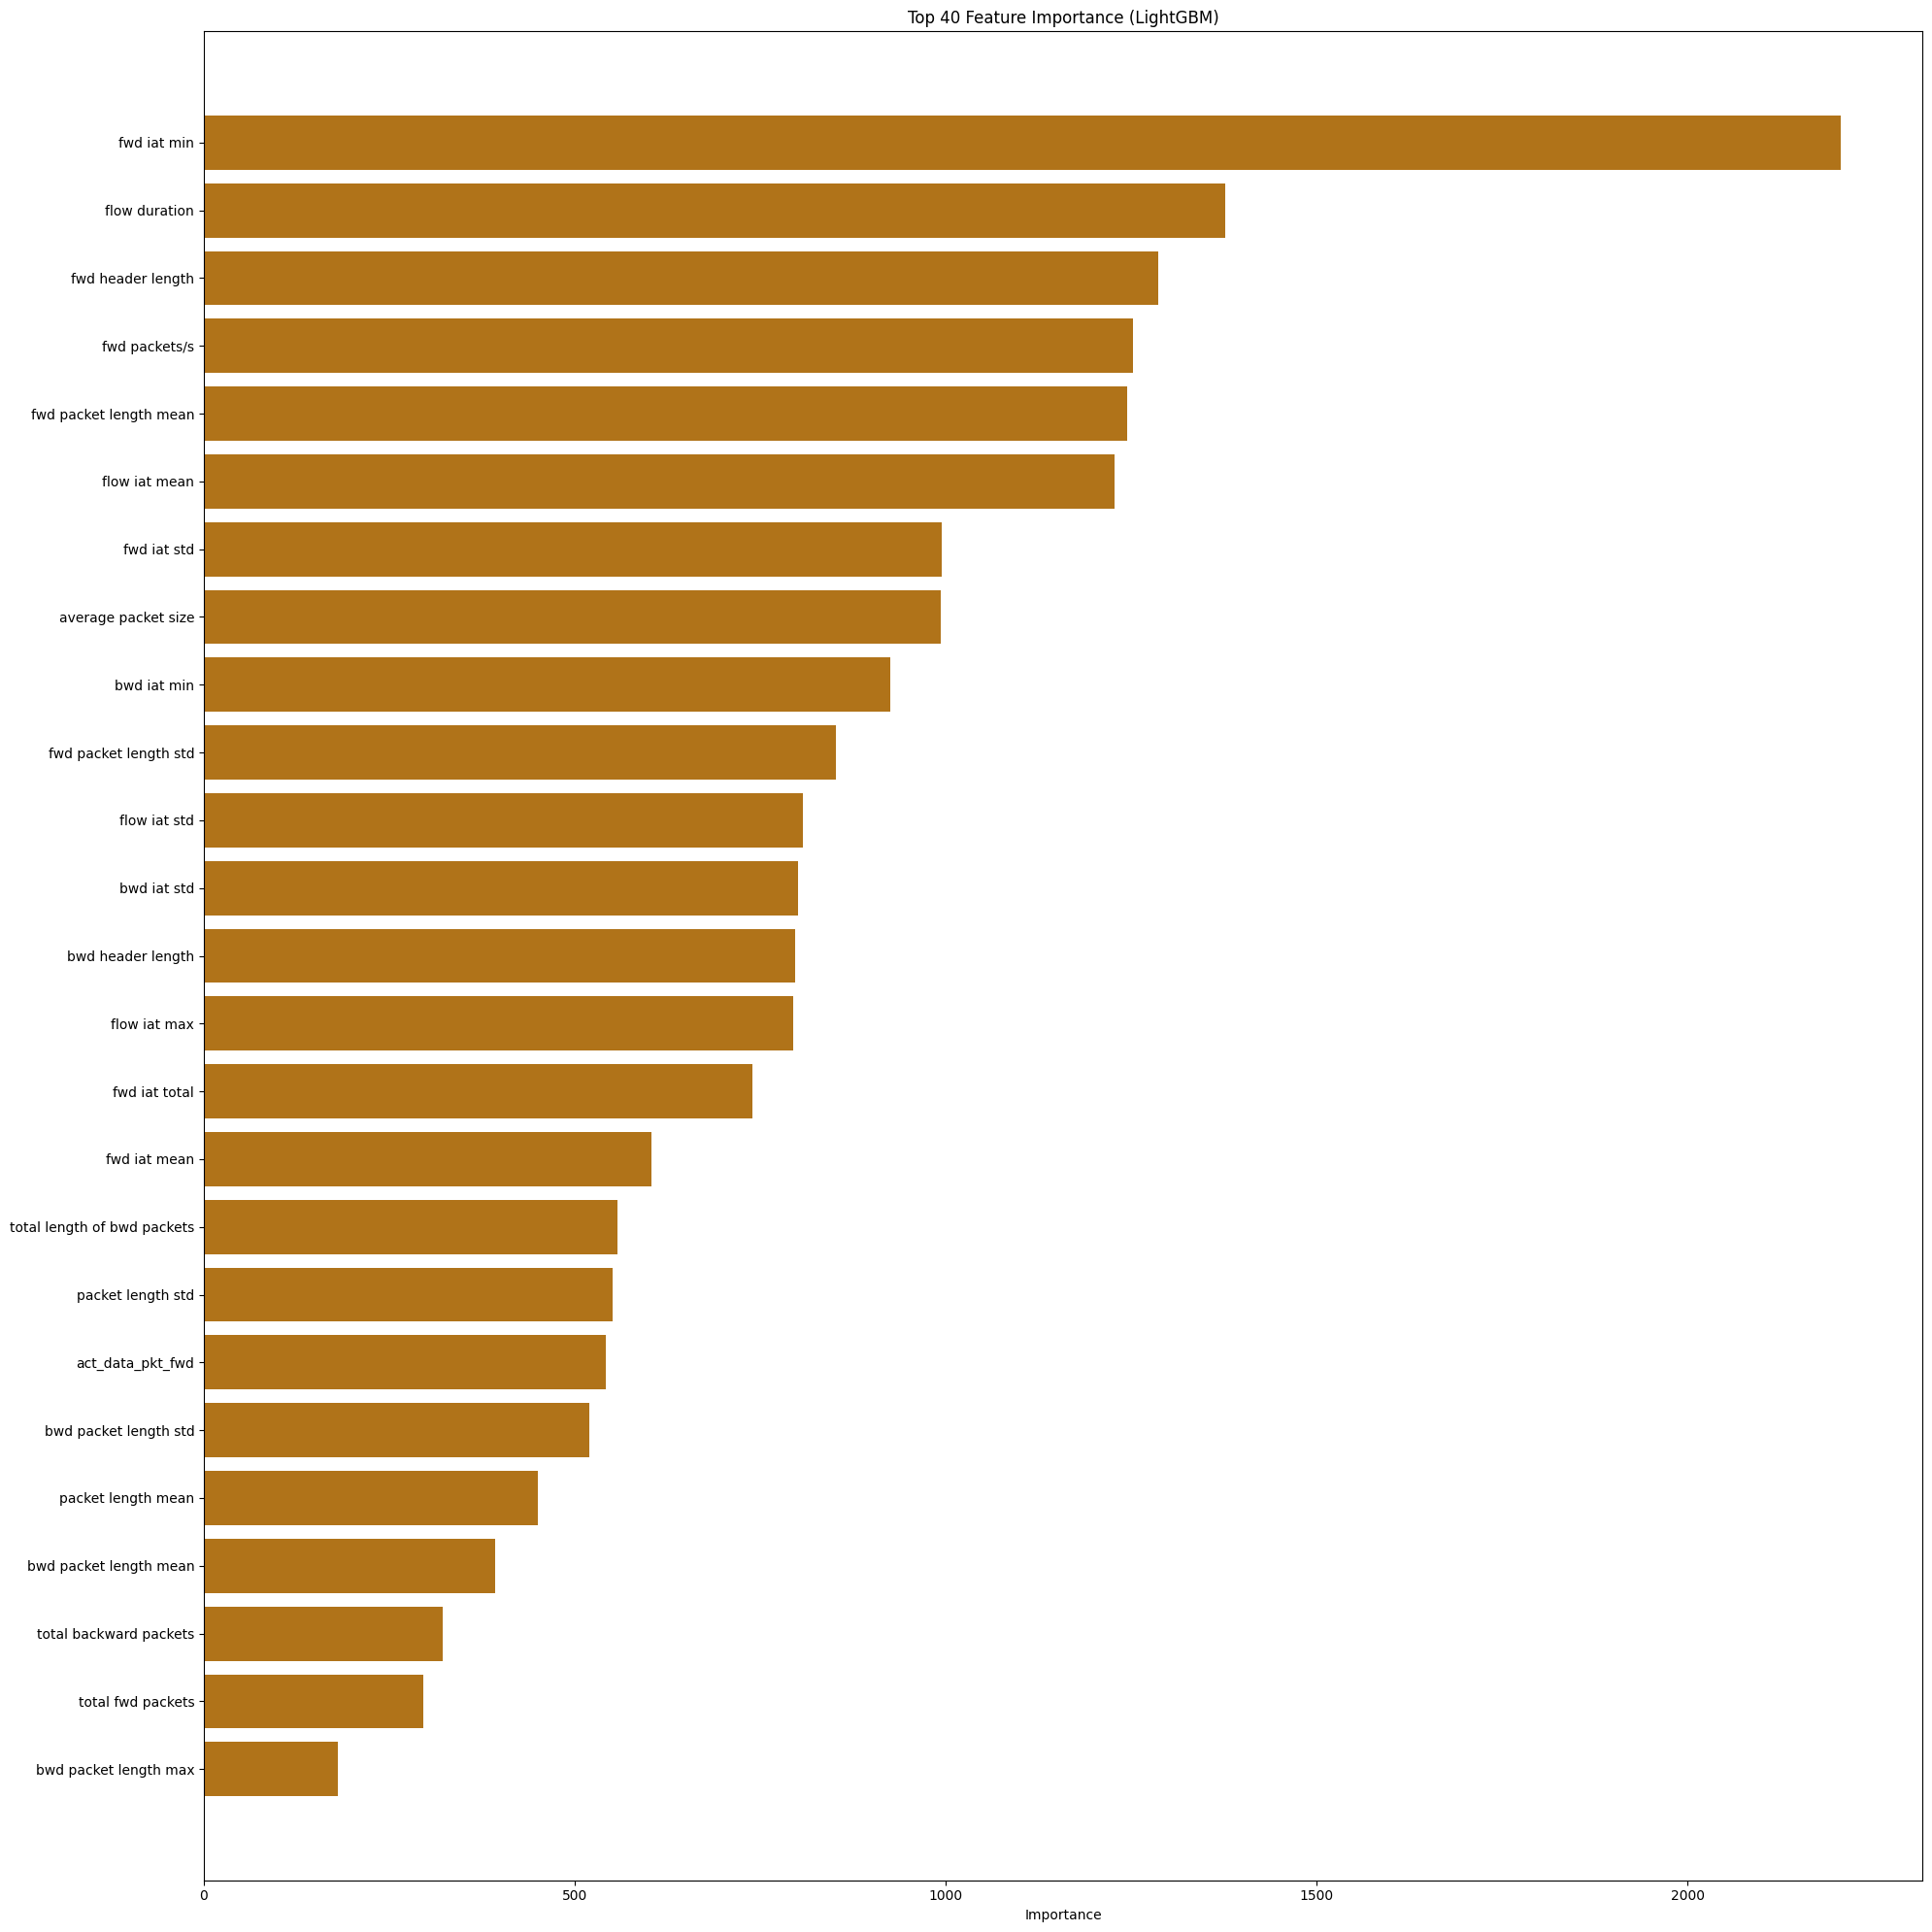

In [36]:
from lightgbm import LGBMClassifier


df_sample = high_corr_features.sample(n=400_000, random_state=42)
x = df_sample.drop(columns=["label"])
y = df_sample["label"]

model = LGBMClassifier(
    n_estimators=100,
    random_state=42,
    verbose=-1
)

model.fit(x, y)
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({
    "feature": x.columns,
    "importance": feature_importance
}).sort_values(by="importance", ascending=False)

print("Feature importance from LightGBM:")
print(importance_df)


plt.figure(figsize=(20, 20))
plt.barh(importance_df["feature"][:40], importance_df["importance"][:40] , color = "#b07319" )
plt.gca().invert_yaxis()
plt.title("Top 40 Feature Importance (LightGBM)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

## heatmap of high corr features with label

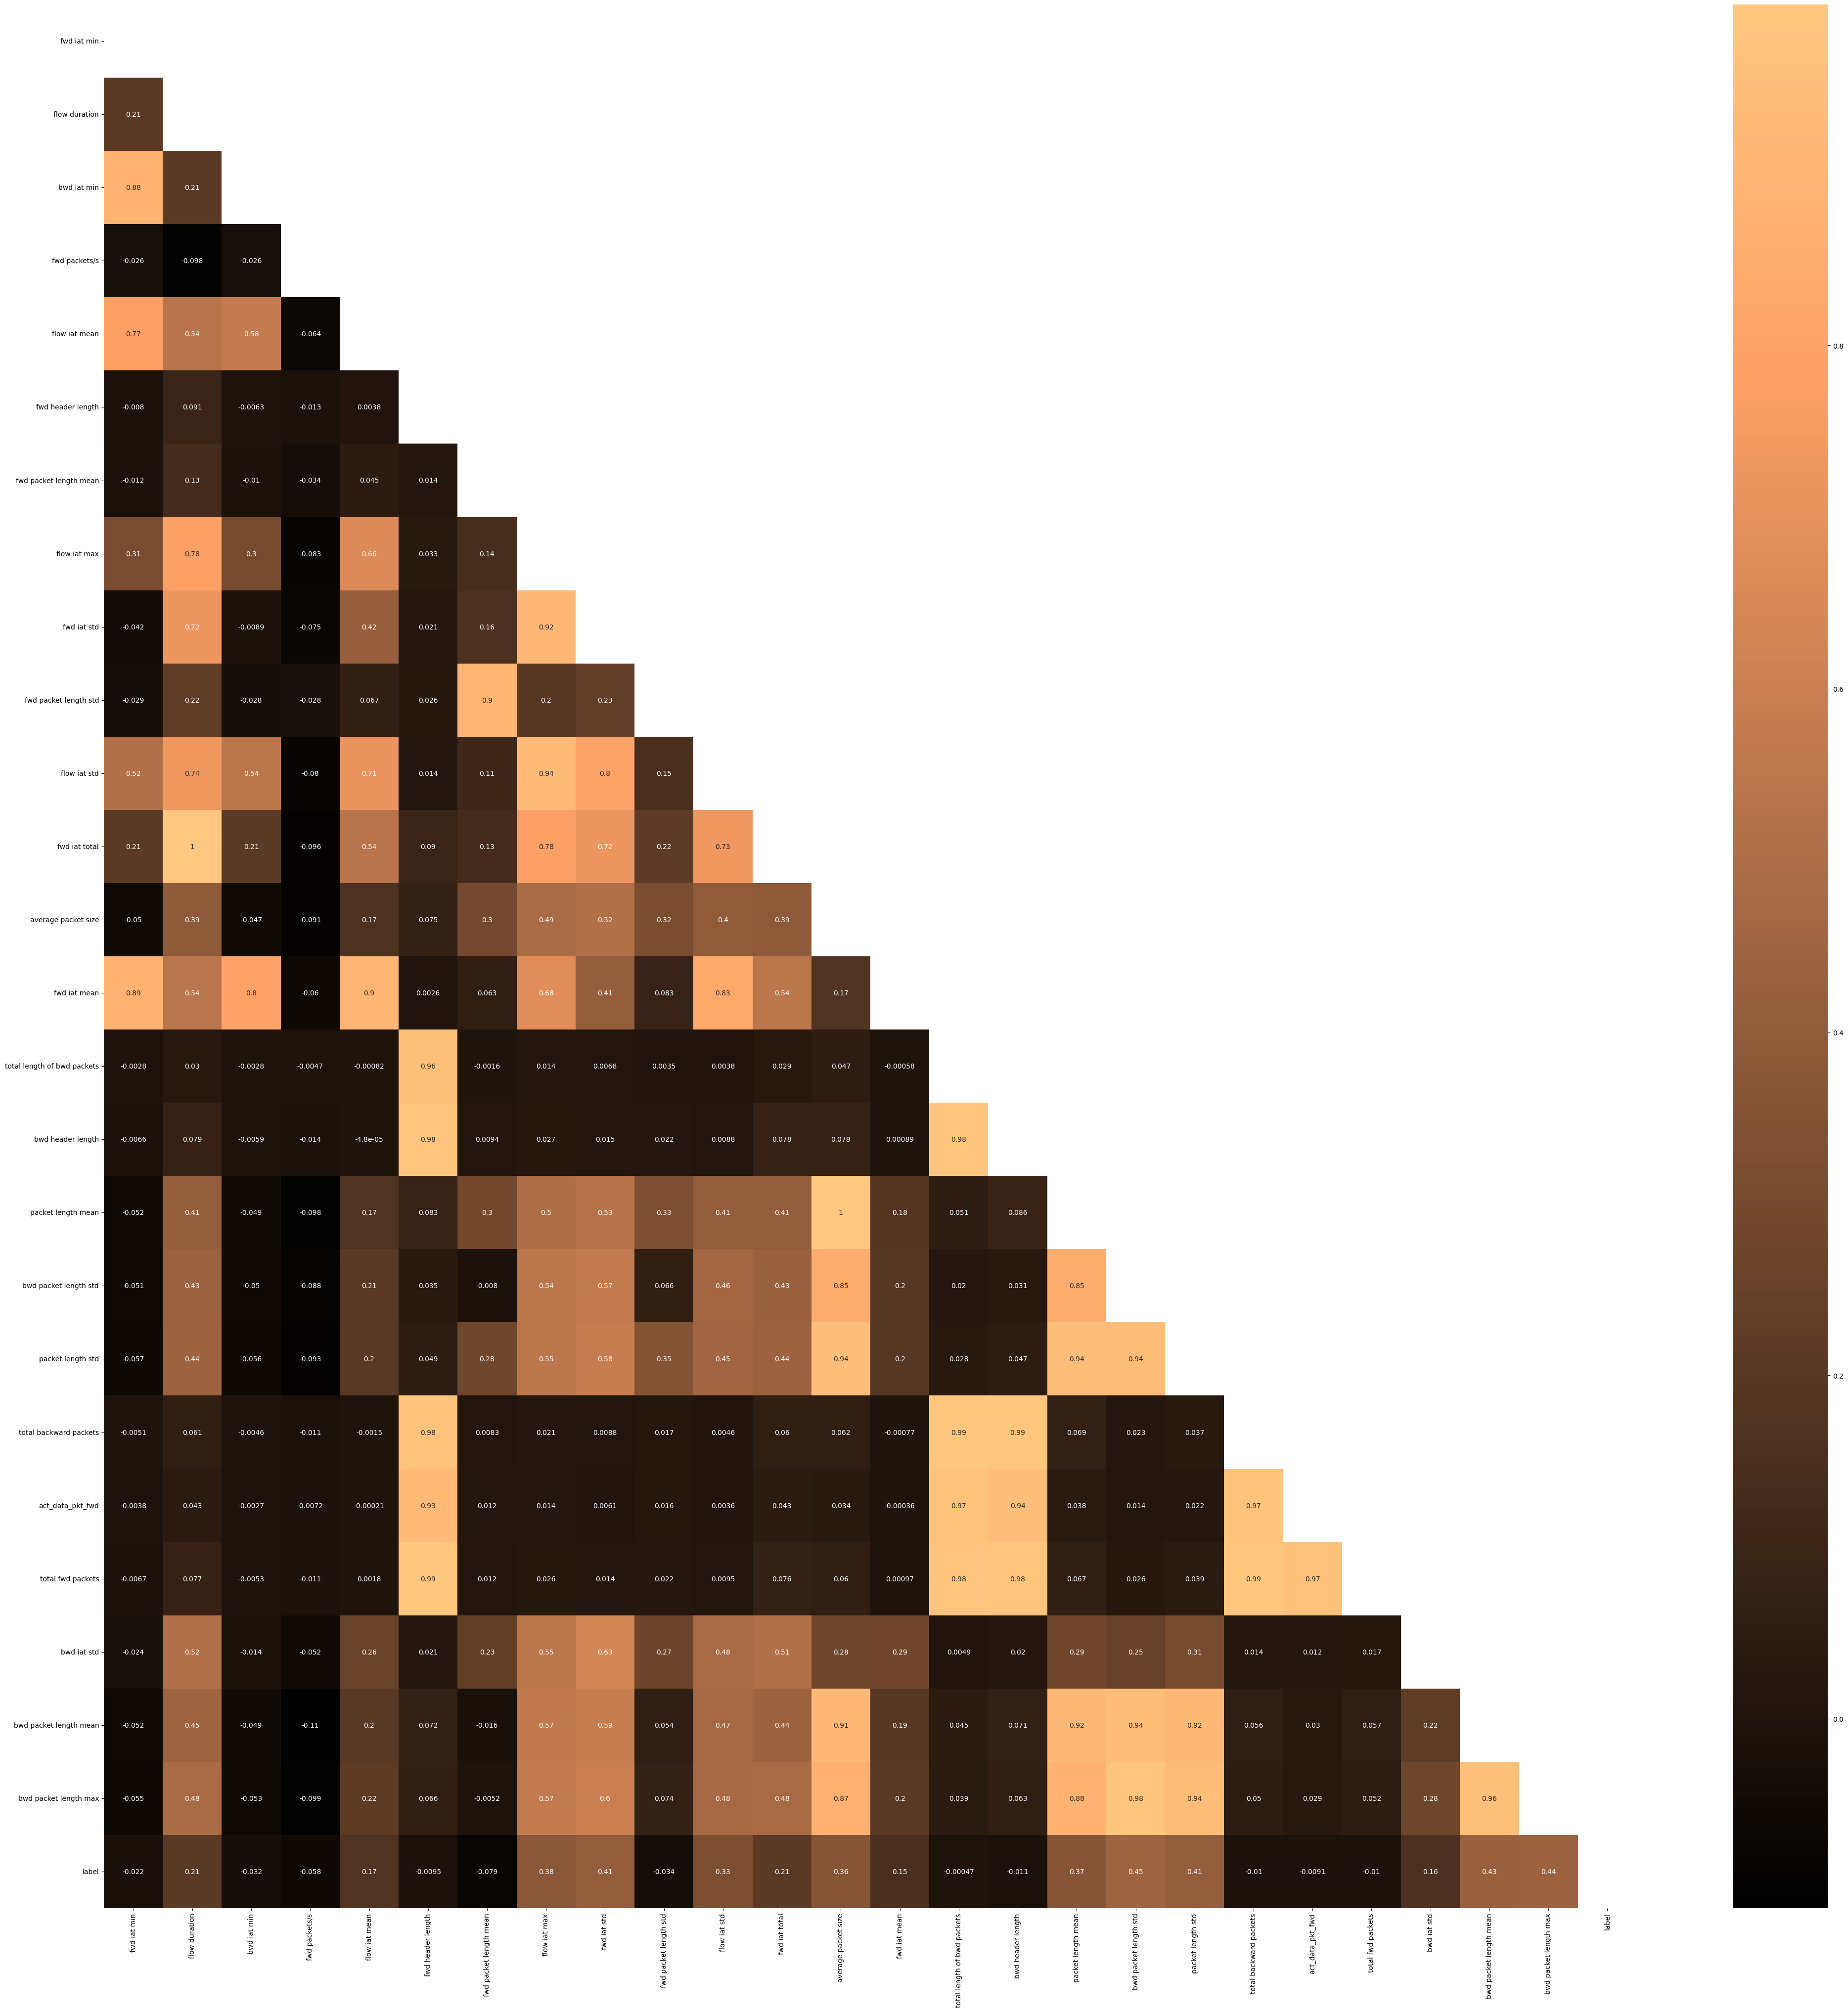

In [37]:
df_4 = high_corr_features
df_4_matrix = df_4.corr()
mask = np.triu(np.ones_like(df_4_matrix , dtype=bool))
plt.figure(figsize=(50,50))
sns.heatmap(df_4_matrix , mask=mask ,  annot= True , cmap= "copper")
plt.savefig("heatmap_for_46_feature.png", dpi=300, bbox_inches='tight')
plt.show()

In [38]:
filtered_high_corr_features =  df[["fwd iat min" , "flow duration"   , "flow iat mean" ,
                         "flow iat max", "fwd iat std",
                         "flow iat std","average packet size",
                         "packet length mean", "bwd packet length std","packet length std" ,
                         "bwd packet length mean", "bwd packet length max"
                       ]]
filtered_high_corr_features.shape

(2470833, 12)

In [39]:
final_df = df[[x for x in final_features["feature"]]]
final_df["label"] = df["label"]
final_df.shape

/tmp/ipython-input-3535061635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["label"] = df["label"]


(2470833, 47)

In [40]:
final_df.drop(columns=["bwd iat min" , "fwd packets/s" , "fwd header length" ,
                       "fwd packet length mean" , "fwd packet length std" , "fwd iat total" , "fwd iat mean" , "total length of bwd packets",
                        "bwd header length" , "total backward packets" , "act_data_pkt_fwd","total fwd packets",  "bwd iat std" ] , inplace = True)
final_df.shape

/tmp/ipython-input-2817007475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=["bwd iat min" , "fwd packets/s" , "fwd header length" ,


(2470833, 34)

In [41]:
final_df.shape

(2470833, 34)

## Handling impalanced data

In [42]:
final_df["label"].value_counts()

label
0    2046251
4     192728
3     127995
7      90694
2       9080
8       2099
1       1944
6         35
5          7
Name: count, dtype: int64

In [43]:
final_df["attack_category"] = df["Attack_Category"]
final_df.head()

/tmp/ipython-input-2386558891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["attack_category"] = df["Attack_Category"]


destination port  flow iat min  fwd iat min  flow bytes/s  flow duration  \
0             54865           3.0          3.0  4.000000e+06            3.0   
1             55054         109.0          0.0  1.100917e+05          109.0   
2             55055          52.0          0.0  2.307692e+05           52.0   
3             46236          34.0          0.0  3.529412e+05           34.0   
4             54863           3.0          3.0  4.000000e+06            3.0   

   bwd packets/s  total length of fwd packets  flow iat mean  flow packets/s  \
0       0.000000                           12            3.0   666666.687500   
1    9174.311523                            6          109.0    18348.623047   
2   19230.769531                            6           52.0    38461.539062   
3   29411.765625                            6           34.0    58823.531250   
4       0.000000                           12            3.0   666666.687500   

   flow iat max  fwd iat std  flow iat std  average packet size  \
0           3.0          0.0           0.0                  9.0   
1         109.0          0.0           0.0                  9.0   
2          52.0          0.0           0.0                  9.0   
3          34.0          0.0           0.0                  9.0   
4           3.0          0.0           0.0                  9.0   

   fwd packet length max  packet length mean  bwd packet length std  \
0                      6                 6.0                    0.0   
1                      6                 6.0                    0.0   
2                      6                 6.0                    0.0   
3                      6                 6.0                    0.0   
4                      6                 6.0                    0.0   

   packet length std  urg flag count  min_seg_size_forward  fwd iat max  \
0                0.0               0                  20.0            3   
1                0.0               1                  20.0            0   
2                0.0               1                  20.0            0   
3                0.0               1                  20.0            0   
4                0.0               0                  20.0            3   

   bwd iat total  bwd iat mean  bwd iat max  bwd packet length mean  \
0              0           0.0            0                     0.0   
1              0           0.0            0                     6.0   
2              0           0.0            0                     6.0   
3              0           0.0            0                     6.0   
4              0           0.0            0                     0.0   

   bwd packet length max  idle mean  fin flag count  max packet length  \
0                      0        0.0               0                  6   
1                      6        0.0               0                  6   
2                      6        0.0               0                  6   
3                      6        0.0               0                  6   
4                      0        0.0               0                  6   

   active mean  active std  down/up ratio  bwd packet length min  \
0          0.0         0.0              0                      0   
1          0.0         0.0              1                      6   
2          0.0         0.0              1                      6   
3          0.0         0.0              1                      6   
4          0.0         0.0              0                      0   

   fwd packet length min  label attack_category  
0                      6      0          Benign  
1                      6      0          Benign  
2                      6      0          Benign  
3                      6      0          Benign  
4                      6      0          Benign

## oversampling using SMOTE

In [44]:
final_df["attack_category"].value_counts()

attack_category
Benign          2046251
DoS              192728
DDoS             127995
PortScan          90694
Brute Force        9080
Web Attack         2099
Bot                1944
Infiltration         35
Heartbleed            7
Name: count, dtype: int64

In [45]:
final_df.shape

(2470833, 35)

In [46]:
final_df.to_csv("final_dataset.csv", index=False)